In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r"D:\Assignments\Logistic Regression\Titanic_test.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                   

In [3]:
df = pd.read_csv(r"D:\Assignments\Logistic Regression\Titanic_train.csv")
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [4]:
# Summary statistics for numerical features
print(df.describe())

# Data types of each column
print(df.dtypes)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      int64
Survived         int64
Pclass           int64
Name        

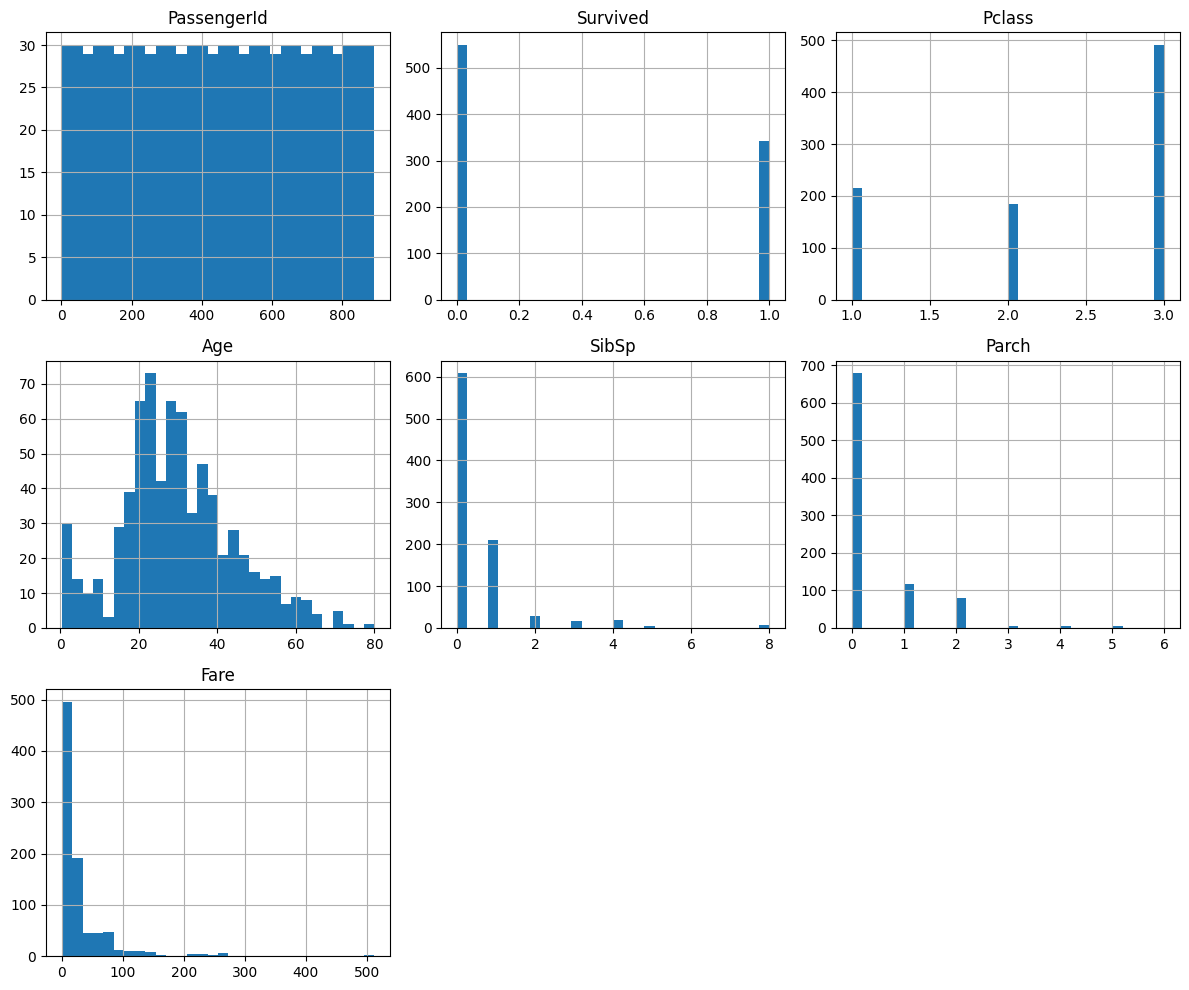

In [5]:
import matplotlib.pyplot as plt

# Histograms for numerical features
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


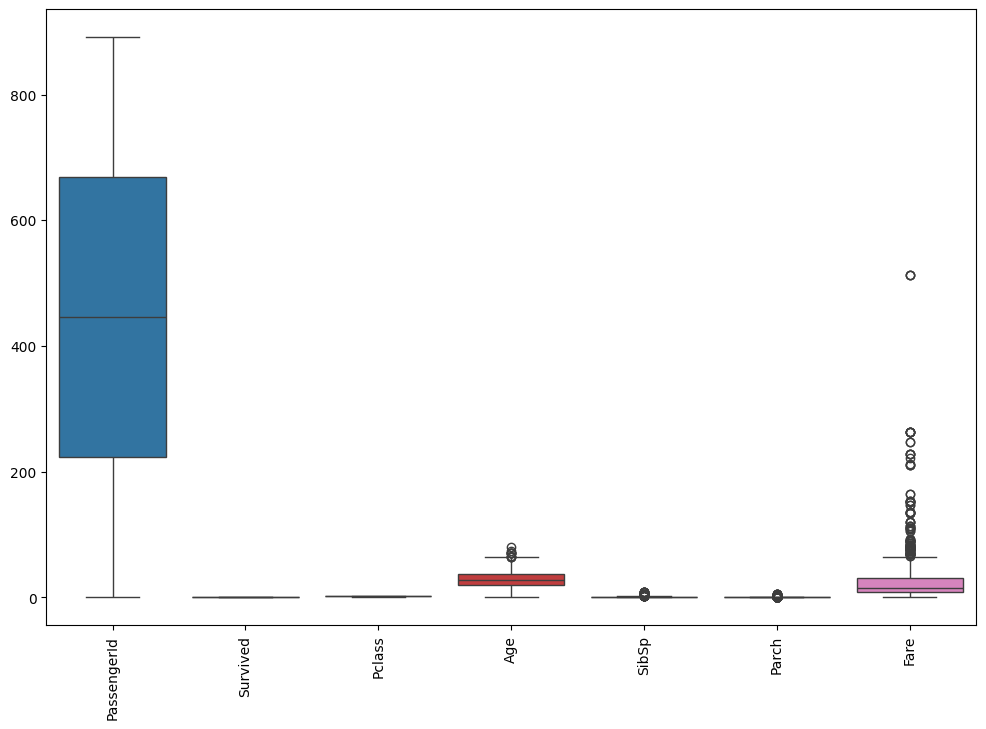

In [6]:
import seaborn as sns

# Box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

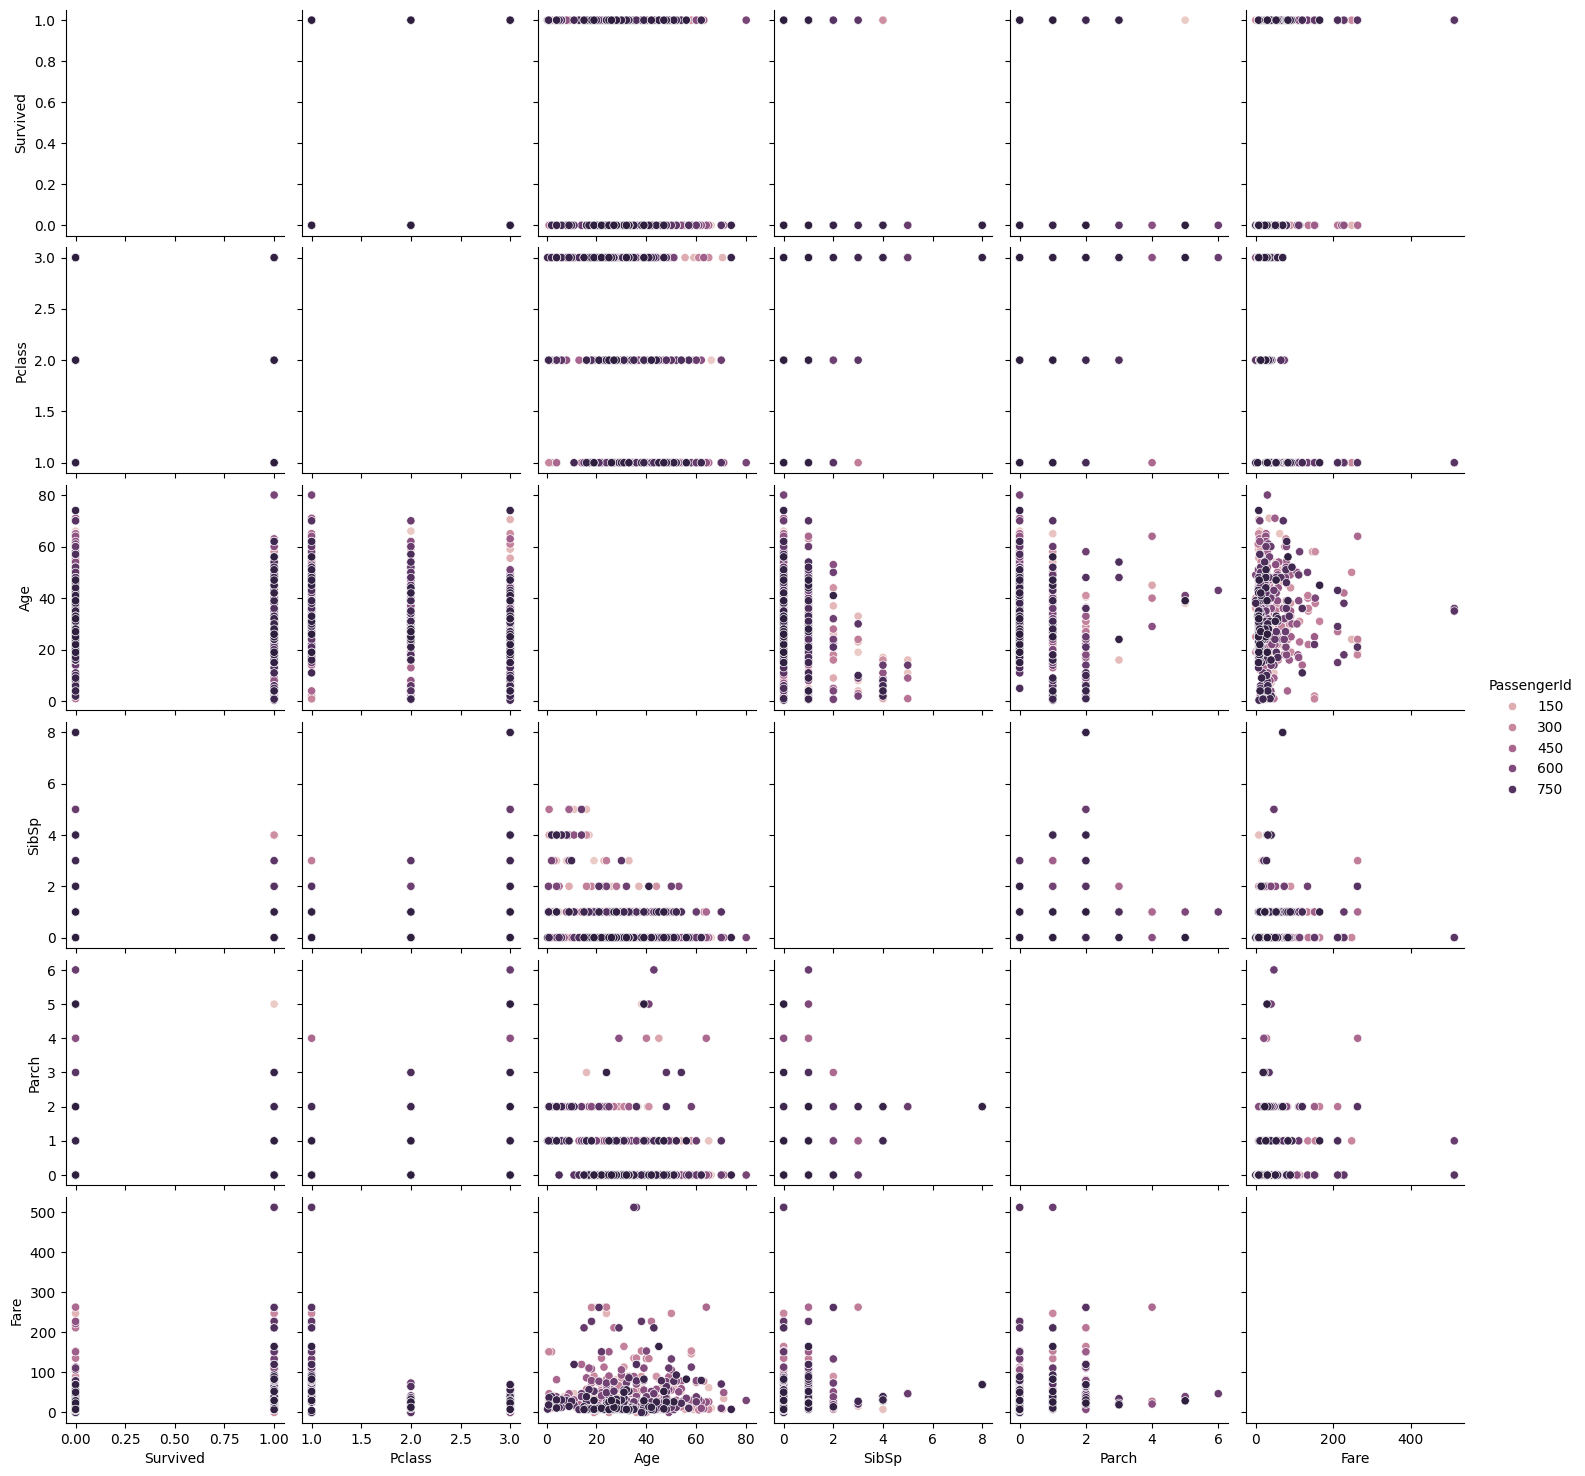

In [8]:
# Pair plot for visualizing relationships between features
sns.pairplot(df, hue='PassengerId')  # Replace 'target' with the name of the target variable
plt.show()


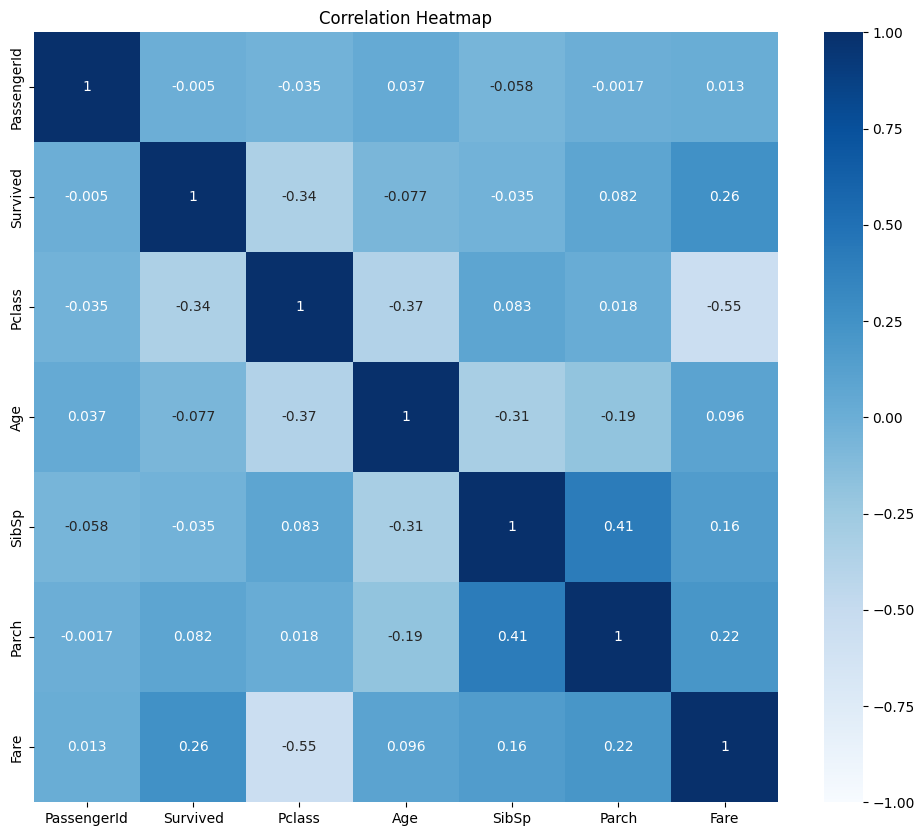

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only= True)
sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values or drop rows/columns
# Example: Impute missing values with the median
df.fillna(df.median(numeric_only=True), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

# Example for label encoding
label_encoder = LabelEncoder()
df['Survived'] = label_encoder.fit_transform(df['Survived'])

# Alternatively, use one-hot encoding
df = pd.get_dummies(df, columns=['Survived'], drop_first=True)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define feature and target variables
X = df.drop('PassengerId', axis=1)  # Replace 'target' with your actual target variable name
y = df['PassengerId']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_standardized = df.copy()

In [14]:
X_train_scaled = df.select_dtypes(include=['float64', 'int64']).columns

In [15]:
# Standardize features
scaler = StandardScaler()

# Fit on the numerical columns of X_train
X_train_scaled = X_train.select_dtypes(include=['float64', 'int64'])
scaler.fit(X_train_scaled)

# Transform both training and testing sets (selecting only numerical columns)
X_train_standardized = scaler.transform(X_train_scaled) # Transform training set
X_test_standardized = scaler.transform(X_test.select_dtypes(include=['float64', 'int64'])) # Transform testing set

# Create new DataFrames for standardized data
df_train_standardized = pd.DataFrame(X_train_standardized, columns=X_train_scaled.columns, index=X_train.index)
df_test_standardized = pd.DataFrame(X_test_standardized, columns=X_train_scaled.columns, index=X_test.index)

# If you need a single standardized DataFrame, you can concatenate:
df_standardized = pd.concat([df_train_standardized, df_test_standardized])

In [16]:
# Standardize features
scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Fit on the numerical columns of X_train
scaler.fit(X_train[numerical_cols])

# Transform both training and testing sets (selecting only numerical columns)
X_train_scaled = scaler.transform(X_train[numerical_cols]) # Transform training set
X_test_scaled = scaler.transform(X_test[numerical_cols]) # Transform testing set

In [17]:
# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro') # Change average to 'macro' or other suitable option
recall = recall_score(y_test, y_pred, average='macro') # Change average to 'macro' or other suitable option
f1 = f1_score(y_test, y_pred, average='macro') # Change average to 'macro' or other suitable option


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# ROC Curve - Adapt for multiclass
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1], pos_label=1) # Assuming you want to plot ROC for class 1

#If you have more than 2 classes you may need to iterate through and plot for each

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
# Predictions
y_pred = model.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Handle ROC AUC for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test)) # Binarize the target
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], model.predict_proba(X_test_scaled)[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], model.predict_proba(X_test_scaled)[:, i])

# Print ROC AUC for each class
for i in range(n_classes):
    print(f"ROC AUC for class {i}:", roc_auc[i])

# You can then plot the ROC curves for each class using fpr and tpr dictionaries

C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC for class 0: 0.6404494382022472
ROC AUC for class 1: 0.061797752808988804
ROC AUC for class 2: 0.3370786516853933
ROC AUC for class 3: 0.005617977528089901
ROC AUC for class 4: 0.3876404494382022
ROC AUC for class 5: 0.6853932584269663
ROC AUC for class 6: 0.0449438202247191
ROC AUC for class 7: 0.3651685393258427
ROC AUC for class 8: 0.7134831460674158
ROC AUC for class 9: 0.1292134831460674
ROC AUC for class 10: 0.0449438202247191
ROC AUC for class 11: 0.9438202247191012
ROC AUC for class 12: 0.5365168539325843
ROC AUC for class 13: 0.7134831460674158
ROC AUC for class 14: 0.7921348314606741
ROC AUC for class 15: 0.8876404494382023
ROC AUC for class 16: 0.4044943820224719
ROC AUC for class 17: 0.8904494382022472
ROC AUC for class 18: 0.553370786516854
ROC AUC for class 19: 0.0730337078651685
ROC AUC for class 20: 0.7415730337078652
ROC AUC for class 21: 0.696629213483146
ROC AUC for class 22: 0.1123595505617978
ROC AUC fo

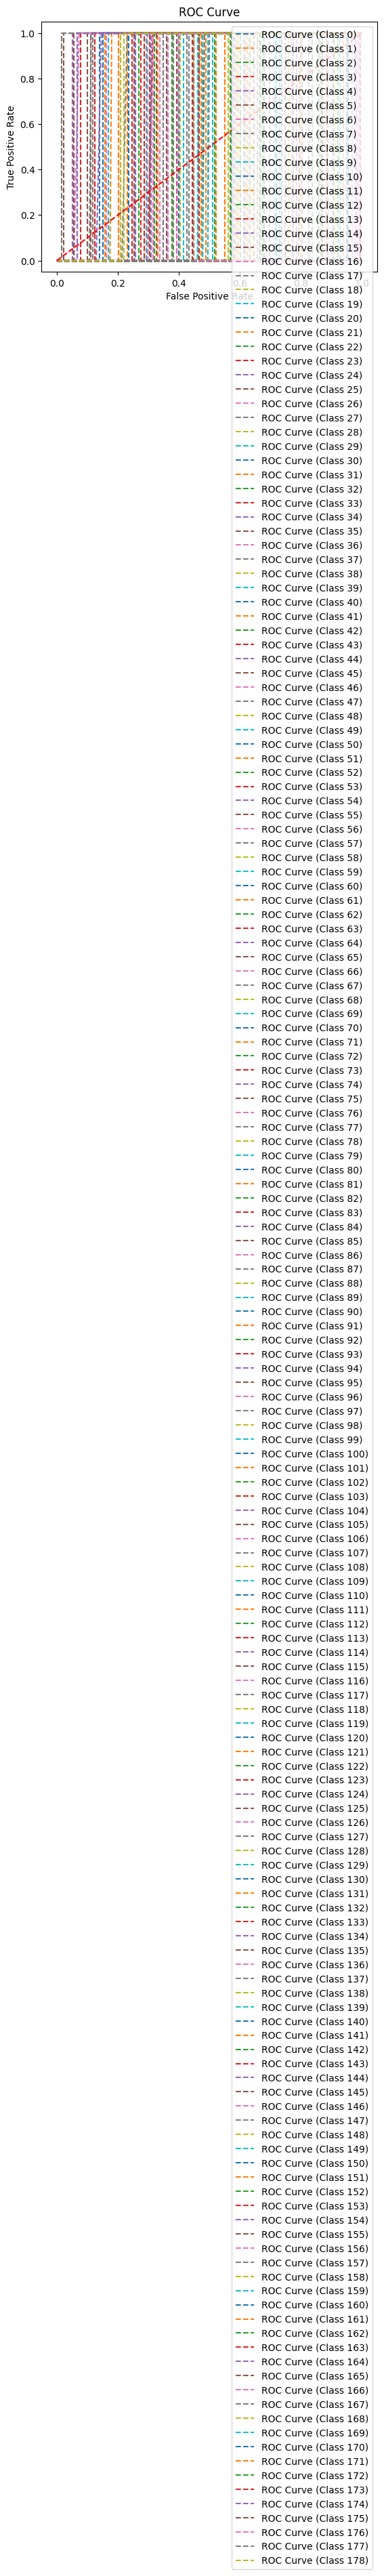

In [20]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'ROC Curve (Class {i})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [22]:
# Coefficients
coefficients = model.coef_[0]  # Assuming you want coefficients for the first class

# Access the column names from the original DataFrame before it was scaled
feature_names = X_train.columns  # Assuming X_train is the DataFrame before scaling

# Ensure both lists have the same length - adjust as needed
# Example: If you only want coefficients for a subset of features
relevant_feature_names = feature_names[:len(coefficients)]

coef_df = pd.DataFrame({'Feature': relevant_feature_names, 'Coefficient': coefficients})
print(coef_df)

  Feature  Coefficient
0  Pclass     0.372719
1    Name    -0.277672
2     Sex     0.385470
3     Age    -0.269178
4   SibSp    -0.185650


In [24]:
import pickle

In [25]:
pickle.dump(model,open('logistic_model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
# dump() will save the model. Pass model name to function, 
# open pickle file in write binary mode. File name can be any thing with .pkl extension i.e. clf.pkl
# once this code is run, clf.pkl file will be created automatically & it will be saved in current working directory (Project Deployment in Jupyter)
# We need this clf.pkl file only for deployment purpose. 